# Titanic Dataset
*Loading the required dataset* 
![ALT TEXT](https://storage.googleapis.com/kaggle-media/welcome/screen1.png)
* It contains a column survived,On which we are going to perform Logistic Regression.
* The required dataset can be Downloaded using this [link](https://www.kaggle.com/c/titanic).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
titanic_data = pd.read_csv("titanic.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Analyzing Data
*Identifying relationships between different features and Survived.*

<AxesSubplot:xlabel='Survived', ylabel='count'>

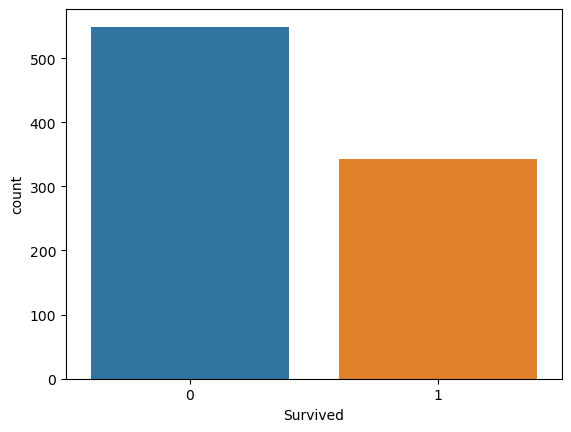

In [2]:
sns.countplot(x = "Survived" , data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

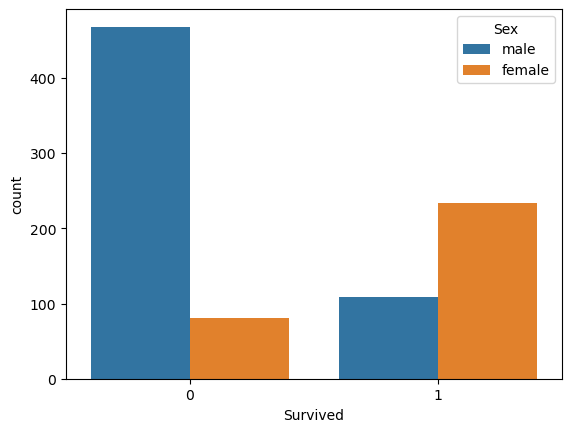

In [3]:
sns.countplot(x = "Survived" , hue = "Sex", data = titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

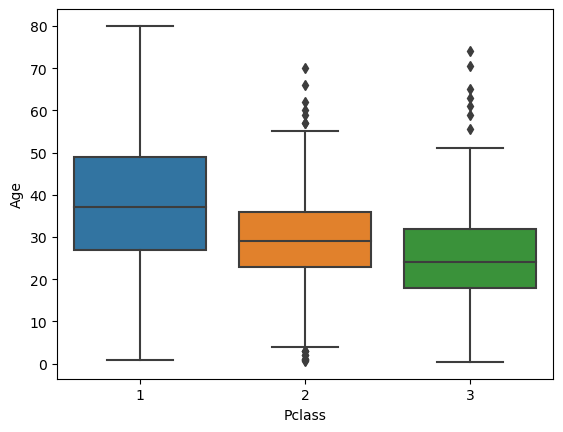

In [4]:
sns.boxplot(x = "Pclass" , y = "Age", data = titanic_data)

## Data Wrangling
*Cleaning Data*

In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

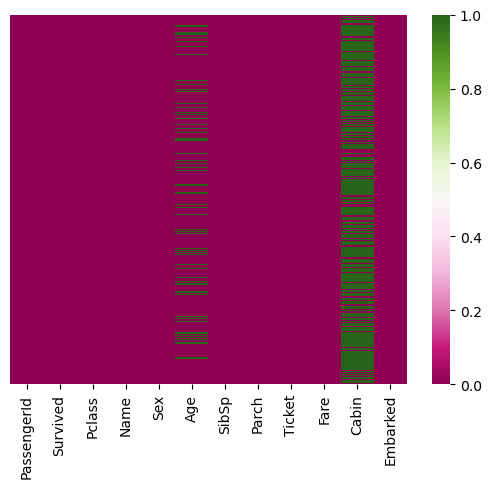

In [6]:
sns.heatmap(titanic_data.isnull(), yticklabels = False,cmap="PiYG")

**Clearly, Age, Cabin and Embarked columns have null values which has to be treated.**

In [7]:
titanic_data.drop("Cabin", axis = 1, inplace = True)

In [8]:
titanic_data.dropna(inplace = True)

In [9]:
titanic_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
sex = pd.get_dummies(titanic_data["Sex"], drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [11]:
embarked = pd.get_dummies(titanic_data["Embarked"], drop_first = True)
embarked.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [12]:
Pcl = pd.get_dummies(titanic_data["Pclass"], drop_first = True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [13]:
titanic_data = pd.concat([titanic_data,sex,embarked,Pcl], axis = 1)

In [14]:
titanic_data.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"], axis = 1, inplace = True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Training and Testing Data

In [15]:
X = titanic_data.drop("Survived",axis = 1)
y = titanic_data["Survived"]

In [16]:
from sklearn.model_selection import train_test_split

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression(max_iter = 1000, solver = "liblinear")

In [20]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [21]:
predictions = model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
confusion_matrix(y_test,predictions)

array([[105,  21],
       [ 25,  63]], dtype=int64)

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       126
           1       0.75      0.72      0.73        88

    accuracy                           0.79       214
   macro avg       0.78      0.77      0.78       214
weighted avg       0.78      0.79      0.78       214



## Accuracy of our model is 79%